In [1]:
using Plots, SpecialFunctions, Random, NLopt,Distributions, Interpolations, Dierckx, LaTeXStrings
gr();

In [2]:
function model(L,Δ,T,a)
N=Int(2L/Δ)+1
xloc=zeros(N)
for i in 1:N
xloc[i]=-L+(i-1)*Δ
end
y=zeros(N)
c(x)=a[1]*(erf((a[2]-(x-a[4]*T))/sqrt(4*a[3]*T))+erf((a[2]+(x-a[4]v*T))/sqrt(4*a[3]*T)))/2;  
for i in 1:N 
y[i] = c(xloc[i])
end 
return y
end

model (generic function with 1 method)

In [3]:
function loglhood(data,a,L,Δ,T,xloc,σ) 
y=zeros(Int(2*L/Δ)+1) 
y=model(L,Δ,T,a)
ℓ=0.0
data_dists=[LogNormal(0,σ) for mi in y];
ℓ+=sum([loglikelihood(data_dists[i],data[i]./y[i]) for i in 1:length(data_dists)]) 
return ℓ
end

loglhood (generic function with 1 method)

In [4]:
a=zeros(4)
function funmle(a)
return loglhood(data,a,L,Δ,T,xloc,σ)
end

funmle (generic function with 1 method)

In [5]:
function Optimise(fun,θ₀,lb,ub)
    
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_NELDERMEAD,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=10*60
    res = optimize(opt,θ₀)
    return res[[2,1]]
end

Optimise (generic function with 1 method)

In [6]:
L=200
Δ=5
N =Int(2L/Δ)+1
xloc=zeros(N)
for i in 1:N
xloc[i]=-L+(i-1)*Δ
end


D=10.0
v=1.0
T=50
U0=1.0
h=50
σ=1.0/5

0.2

In [7]:
data = [1.443529214802643e-10
2.3218269790487678e-10
1.0228639233757297e-9
1.805676854138166e-9
4.840278669608082e-9
1.7039099334160228e-8
4.2487847359203066e-8
1.0897076488179797e-7
1.6297115566204057e-7
5.619380728678323e-7
1.27607240633502e-6
2.11026670323913e-6
7.23659951163088e-6
1.0355981844404721e-5
2.297839380764977e-5
3.515164745692764e-5
9.420598475706468e-5
0.00018648942209725184
0.00030874873490431787
0.0006722105184516749
0.0007643851188759354
 0.0013215399694911142
 0.0021727863700348256
 0.0036629275218593993
 0.00588360993881856
 0.0062694002983311
 0.014803296353026425
 0.01951203266481328
 0.02407215297691123
 0.04171503969089537
 0.04397004901777453
 0.0717014303967583
 0.11151745578656194
 0.12976000843879903
 0.14086246684559256
 0.1870022738251664
 0.2501776103308435
 0.29466463480742117
 0.533350088841853
 0.37821234635970064
 0.7015423565364873
 0.556565589913085
 0.45279561548388
 0.9817770380772471
 0.7313368944696472
 0.7816145735619514
 1.049339216720264
 0.7662825270723039
 1.1927507203925707
 0.9704088510373458
 0.9508912611533775
 0.6382250802017383
 0.9260205533028476
 0.8055751403061922
 0.6882395782605749
 0.8958340909215593
 0.6445706982093314
 0.5436695103453301
 0.5012595454482108
 0.4170150857092262
 0.45954676296469504
 0.3426768404377206
 0.4012976322328738
 0.4253142813391668
 0.2458843401540494
 0.15885386265508783
 0.19381988029839897
 0.09551123321734424
 0.09904587148790636
 0.08911538395417264
 0.049742505161755615
 0.05251969031689682
 0.035388426388368435
 0.024952113255135203
 0.013456312282987123
 0.00803477659176543
 0.00818937282914698
 0.0027920787549109345
 0.00223917121213745
 0.0012290739636724294
 0.0007845603474930095];

  0.182857 seconds (1.36 M allocations: 58.026 MiB, 6.45% gc time, 89.30% compilation time)


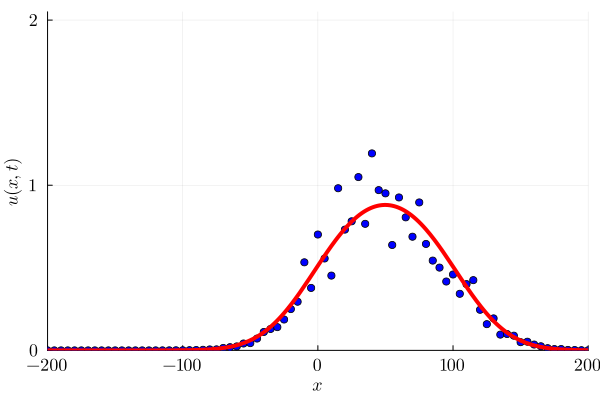

In [8]:
θG=[1,50,10,1]
lb=[0,0,0.01,-100]
ub=[100,L,1000,100]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
U0mle=xopt[1]
hmle=xopt[2]
Dmle=xopt[3]
vmle=xopt[4]
fmle=fopt
umle(x)=U0mle*(erf((hmle-(x-vmle*T))/sqrt(4*Dmle*T))+erf((hmle+(x-vmle*T))/sqrt(4*Dmle*T)))/2;
p1=scatter(xloc,data,mc=:blue,msc=:match,label=false)
p1=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+0.1))
p1=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p1=plot!(ylims=(0,2.05),yticks=([0,1,2],[L"0", L"1", L"2"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

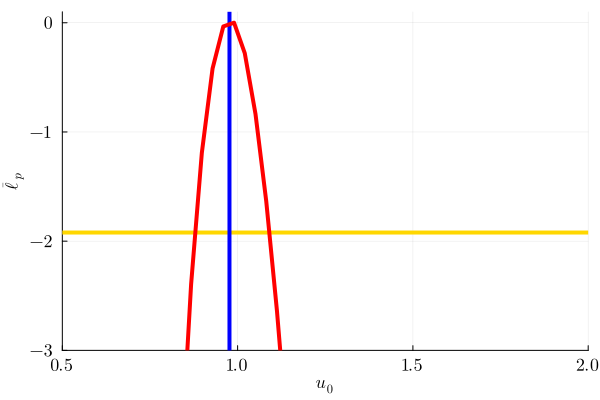

In [17]:
df=1
llstar=-quantile(Chisq(df),0.95)/2

function univariateU0(U0)
    a=zeros(3)    
    function funU0(a)
    return loglhood(data,[U0,a[1],a[2],a[3]],L,Δ,T,xloc,σ)
    end
    θG=[hmle,Dmle,vmle]
    lb=[0,0.01,-100]
    ub=[L,1000,100]
    (xopt,fopt)=Optimise(funU0,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateU0(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
U0range=LinRange(0.5,2.0,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateU0(U0range[i])[1]
end

q1=hline([llstar],legend=false,lw=4,color=:gold)
q1=vline!([U0mle],legend=false,xlabel=L"u_0",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(U0range,ff.-maximum(ff),w=ones(length(U0range)),k=3,bc="nearest",s=0.01)
yy=evaluate(spl,U0range)
q1=plot!(U0range,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(U0range[1],U0range[end]))
q1=plot!(xlims=(0.5,2.0),xticks=([0.5,1.0,1.5,2.0],[L"0.5",L"1.0", L"1.5", L"2.0"]))
q1=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

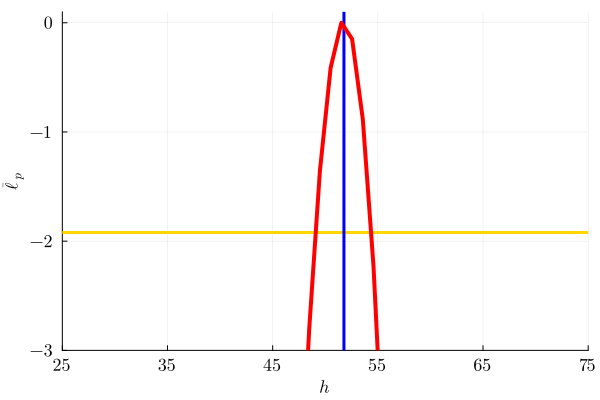

In [18]:
function univariateh(h)
    a=zeros(3)    
    function funh(a)
        return loglhood(data,[a[1],h,a[2],a[3]],L,Δ,T,xloc,σ)
    end
    θG=[U0mle,Dmle,vmle]
    lb=[0,0.01,-100]
    ub=[100,1000,100]
    (xopt,fopt)=Optimise(funh,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateh(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
hrange=LinRange(25,75,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateh(hrange[i])[1]
end

q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([hmle],legend=false,xlabel=L"h",ylabel=L"\bar{\ell}_p",lw=3,color=:blue)
spl=Spline1D(hrange,ff.-maximum(ff),w=ones(length(hrange)),k=1,bc="nearest",s=0.001)
yy=evaluate(spl,hrange)
q2=plot!(hrange,yy,lw=4,lc=:red,ylims=(-3,0,0.1),xlims=(hrange[1],hrange[end]))
q2=plot!(xlims=(25,75),xticks=([25,35,45,55,65,75],[L"25",L"35", L"45", L"55", L"65", L"75"]))
q2=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

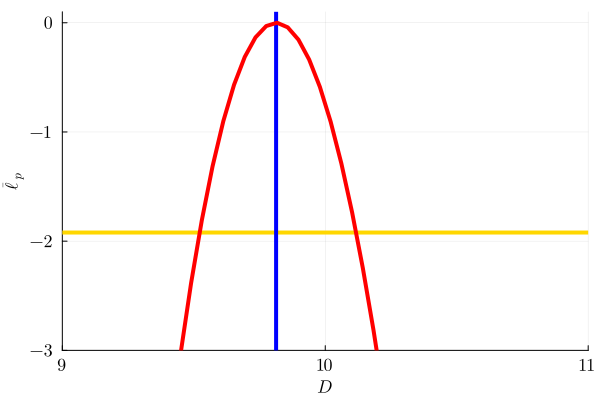

In [19]:
function univariateD(D)
    a=zeros(3)    
    function funD(a)
    return loglhood(data,[a[1],a[2],D,a[3]],L,Δ,T,xloc,σ)
    end
    θG=[U0mle,hmle,vmle]
    lb=[0,0,0]
    ub=[100,L,100]
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Drange=LinRange(9,11,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
end


q3=hline([llstar],legend=false,lw=4,color="gold")
q3=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=0.001)
yy=evaluate(spl,Drange)
q3=plot!(Drange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q3=plot!(xlims=(9,11),xticks=([9,10,11],[L"9",L"10", L"11"]))
q3=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

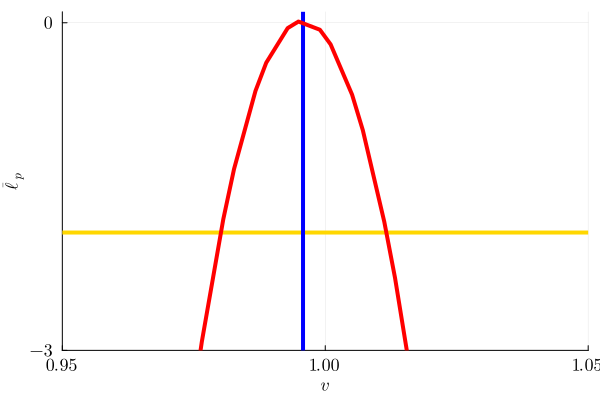

In [20]:
function univariatev(v)
    a=zeros(3)    
    function funv(a)
    return loglhood(data,[a[1],a[2],a[3],v],L,Δ,T,xloc,σ)
    end     

    θG=[U0mle,hmle,Dmle]
    lb=[0,0,0.01]
    ub=[100,L,1000]
    
    (xopt,fopt)=Optimise(funv,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariatev(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
vrange=LinRange(0.95,1.05,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariatev(vrange[i])[1]
end

q4=hline([llstar],legend=false,lw=4,color=:gold)
q4=vline!([vmle],legend=false,xlabel=L"v",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(vrange,ff.-maximum(ff),w=ones(length(vrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,vrange)
q4=plot!(vrange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(vrange[1],vrange[end]))
q4=plot!(xlims=(0.95,1.05),xticks=([0.95,1.00,1.05],[L"0.95",L"1.00", L"1.05"]))
q4=plot!(ylims=(-3,0.1),yticks=([-3,0],[L"-3", L"0"]))
q4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

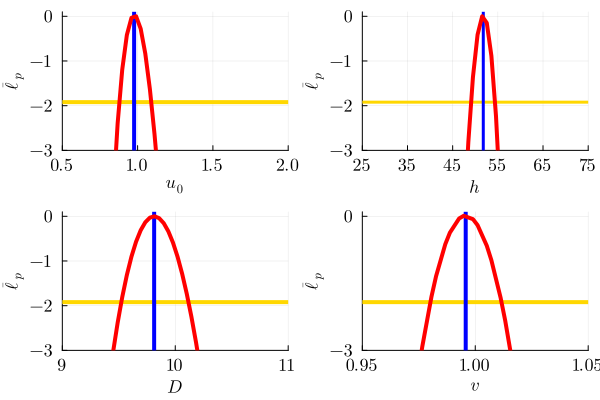

In [21]:
q5=plot(q1,q2,q3,q4,layout=(2,2))

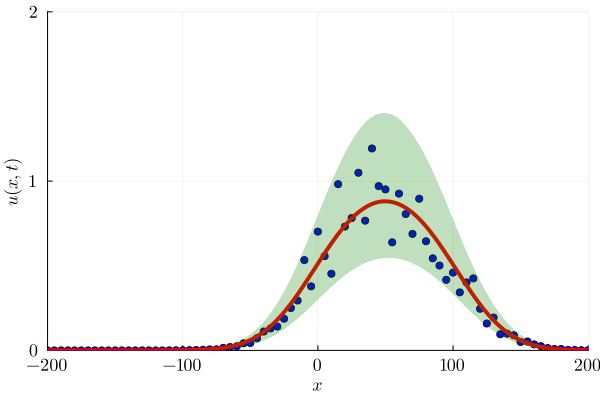

In [22]:
U0min=0.7;
U0max=1.4;
hmin=45;
hmax=60;
Dmin=9;
Dmax=11;
vmin=0.95;
vmax=1.05;

df=4
llstar=-quantile(Chisq(df),0.95)/2
M=1000
Usampled=zeros(M)
hsampled=zeros(M)
Dsampled=zeros(M)
vsampled=zeros(M)
lls=zeros(M)
kount = 0

while kount < M
U0g=rand(Uniform(U0min,U0max))
hg=rand(Uniform(hmin,hmax))
Dg=rand(Uniform(Dmin,Dmax))
vg=rand(Uniform(vmin,vmax))
    if (loglhood(data,[U0g,hg,Dg,vg],L,Δ,T,xloc,σ)-fmle) >= llstar
    kount+=1
    lls[kount]=loglhood(data,[U0g,hg,Dg,vg],L,Δ,T,xloc,σ)-fmle
    Usampled[kount]=U0g;
    hsampled[kount]=hg;
    Dsampled[kount]=Dg;
    vsampled[kount]=vg;
    end
end

Δf=1
Nf =Int(2L/Δf)+1
xlocf=zeros(Nf)
for i in 1:Nf
xlocf[i]=-L+(i-1)*Δf
end

lower=2*(U0)*ones(length(xlocf))
upper=zeros(length(xlocf))

for i in 1:M
C(x)=Usampled[i]*(erf((hsampled[i]-(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T))+erf((h+(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T)))/2;

    for j in 1:length(xlocf)
        if C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[1]) < lower[j] 
            lower[j] = C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[1])
        end
       
        if C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[2]) > upper[j] 
            upper[j] = C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[2]) 
        end
       
    end

end
p1=scatter(xloc,data,mc=:blue,msc=:match,label=false)
p1=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+0.1))
p1=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p1=plot!(ylims=(0,2.05),yticks=([0,1,2],[L"0", L"1", L"2"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xlocf,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,xlims=(-L,L),ylims=(0,2),label=false)

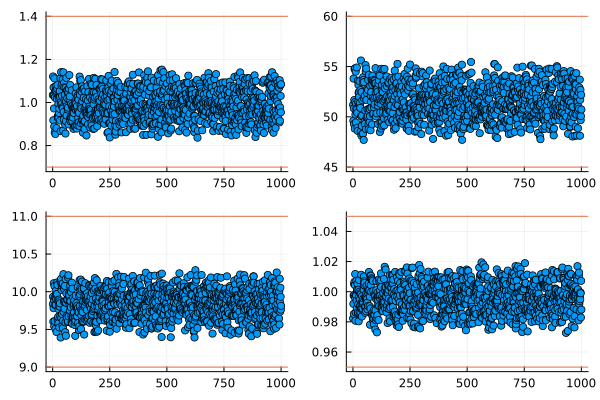

In [23]:
q1=scatter(Usampled,legend=false)
q1=hline!([U0min,U0max],legend=false)

q2=scatter(hsampled,legend=false)
q2=hline!([hmin,hmax],legend=false)

q3=scatter(Dsampled,legend=false)
q3=hline!([Dmin,Dmax],legend=false)

q4=scatter(vsampled,legend=false)
q4=hline!([vmin,vmax],legend=false)

q4=plot(q1,q2,q3,q4,layout=(2,2))